<a href="https://colab.research.google.com/github/StacyWK/Sentiment-analysis-of-Telsa-Financial-news-using-VADER-and-newsAPI/blob/main/Sentiment_Analysis_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import nltk

nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Show full output in Colab
# https://stackoverflow.com/questions/54692405/output-truncation-in-google-colab
pd.set_option('display.max_colwidth',1000)

In [ ]:
# Obtain an Access Key for the NewsAPI
# Initialize news api
NEWS_API_KEY = 'dc00f254b22e4fe9bb2c690f62e7607c'

In [ ]:
#https://newsapi.org/docs/endpoints/everything

newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = date.today() - timedelta(days=1) 
# datetime.strptime('15-Sept-2022','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [ ]:
articles

{'status': 'ok',
 'totalResults': 76,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'tmohamed@businessinsider.com (Theron Mohamed)',
   'title': "Apple has unseated Tesla as the most-shorted US stock - after Elon Musk's EV company held the title for 864 days",
   'description': 'Short interest in Apple stock has reached $18.4 billion, exceeding the $17.4 billion wagered against Tesla stock.',
   'url': 'https://markets.businessinsider.com/news/stocks/apple-tesla-tech-stocks-short-sellers-elon-musk-ev-autos-2022-9',
   'urlToImage': 'https://i.insider.com/61b9e1cdf7530b0018bf358b?width=1200&format=jpeg',
   'publishedAt': '2022-09-15T12:57:25Z',
   'content': 'Investors are betting more money against Apple than Tesla for the first time since April 2020, S3 Partners revealed in a report titled "Apple is the New #1 Short" on Wednesday.\r\nShort interest in App… [+2040 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'autho

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()

  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

    Sentiment  \
0      0.5267   
1      0.1263   
2      0.6360   
3      0.3400   
4      0.5423   
..        ...   
69    -0.5859   
70    -0.1280   
71    -0.4939   
72    -0.1531   
73    -0.2023   

                                                                                                                                                              URL  \
0                                                 https://markets.businessinsider.com/news/stocks/apple-tesla-tech-stocks-short-sellers-elon-musk-ev-autos-2022-9   
1                                                                     https://www.reuters.com/markets/europe/futures-subdued-ahead-raft-economic-data-2022-09-15/   
2                                                                        https://investorplace.com/2022/09/beware-the-latest-nio-stock-surge-will-be-short-lived/   
3                                                                    https://www.reuters.com/breakingviews/patagonia-lobs-esg-breakup-c

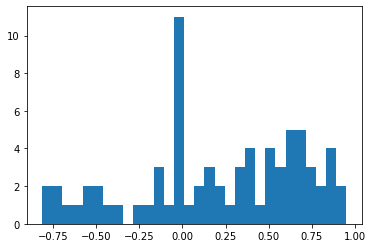

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

my_date = date.today() - timedelta(days=1) 

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)

In [ ]:
return_articles["Date"] = my_date

In [ ]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,0.5267,https://markets.businessinsider.com/news/stocks/apple-tesla-tech-stocks-short-sellers-elon-musk-ev-autos-2022-9,Apple has unseated Tesla as the most-shorted US stock - after Elon Musk's EV company held the title for 864 days,"Short interest in Apple stock has reached $18.4 billion, exceeding the $17.4 billion wagered against Tesla stock.",2022-09-15
1,0.1263,https://www.reuters.com/markets/europe/futures-subdued-ahead-raft-economic-data-2022-09-15/,Futures subdued ahead of raft of economic data - Reuters,U.S. stock index futures struggled for direction on Thursday after lackluster trading in the previous session as investors awaited a slew of economic data that could provide more clarity on the Federal Reserve's monetary policy tightening path.,2022-09-15
2,0.6360,https://investorplace.com/2022/09/beware-the-latest-nio-stock-surge-will-be-short-lived/,Beware! The Latest NIO Stock Surge Will Be Short-Lived,"Even a small amount of disappointment could put NIO stock back in reverse Nio (NIO) stock back above $20 per share after analyst upgrades. Despite the renewed bullishness, shares in the China-based EV maker could easily give back these latest gains. Given the…",2022-09-15
3,0.3400,https://www.reuters.com/breakingviews/patagonia-lobs-esg-breakup-calls-back-wild-2022-09-16/,Breakingviews - Patagonia lobs ESG breakup calls back to the wild - Reuters.com,"If there were more Yvon Chouinards, humans might be doing a better job of battling global warming. Such sentiments are doing the rounds on social media since the founder of Patagonia <a href=""https://nam02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fw…",2022-09-15
4,0.5423,https://www.fool.com/investing/2022/09/15/1-stock-split-stock-could-plunge-92-wall-street/,"1 Widely Held Stock-Split Stock That Could Plunge 92%, According to Wall Street","Among six popular stock-split stocks in 2022 -- Alphabet, Amazon, Tesla, DexCom, Shopify, and Palo Alto Networks -- is one company that a select Wall Street analyst believes will plummet.",2022-09-15
